In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r"D:\used_car_price_prediction\data\vehicles.csv")

In [4]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [6]:
df.shape

(426880, 26)

In [7]:
processed_df = df[['year', 'manufacturer', 'condition', 'cylinders',
    'fuel', 'odometer', 'title_status', 'transmission',
    'drive', 'size', 'type','price']].copy()

In [8]:
processed_df.to_csv(r"D:\used_car_price_prediction\data\processed_vehicles.csv", index=False)

In [9]:
processed_df.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11900
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4900


In [10]:
processed_df.isna().sum()

year              1205
manufacturer     17646
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
price                0
dtype: int64

In [41]:
(processed_df.isna().sum() / len(processed_df)) * 100


year             0.000000
manufacturer     0.000000
condition       40.877102
cylinders       41.432530
fuel             0.623848
odometer         1.014334
title_status     1.893538
transmission     0.558849
drive           30.095740
size            71.825166
type            21.105773
price            0.000000
dtype: float64

In [23]:
processed_df['year'] = processed_df['year'].fillna(processed_df['year'].mode()[0])

In [25]:
processed_df['year'] = processed_df['year'].astype(int)

In [26]:
processed_df['year'].head()

0    2017
1    2017
2    2017
3    2017
4    2017
Name: year, dtype: int64

In [27]:
processed_df['manufacturer'].value_counts().head(10)

manufacturer
ford         70985
chevrolet    55064
toyota       34202
honda        21269
nissan       19067
jeep         19014
ram          18342
gmc          16785
bmw          14699
dodge        13707
Name: count, dtype: int64

In [33]:
import numpy as np

In [34]:
processed_df.replace("NaN", np.nan, inplace=True)

In [39]:
processed_df.dropna(subset=['manufacturer'], inplace=True)

In [40]:
processed_df['manufacturer'].isna().sum()

np.int64(0)

In [45]:
processed_df['condition']=processed_df['condition'].fillna('unknown')


In [47]:
processed_df['condition'].value_counts().head(10)

condition
unknown      167283
good         116215
excellent     97631
like new      20212
fair           6170
new            1172
salvage         551
Name: count, dtype: int64

In [49]:
processed_df['cylinders'] = processed_df.groupby('manufacturer')['cylinders'].transform(
    lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x.fillna('unknown')
)
processed_df['cylinders'].value_counts()

cylinders
6 cylinders     139645
8 cylinders     133751
4 cylinders     128453
5 cylinders       3494
other             1838
10 cylinders      1364
3 cylinders        559
12 cylinders       130
Name: count, dtype: int64

In [50]:
processed_df.dropna(subset=['fuel'], inplace=True)

In [51]:
processed_df.dropna(subset=['odometer'], inplace=True)

In [54]:
processed_df['title_status'].fillna('unknown', inplace=True)

In [65]:
processed_df.isna().sum()

year                0
manufacturer        0
condition           0
cylinders           0
fuel                0
odometer            0
title_status        0
transmission        0
drive               0
size                0
type            85206
price               0
dtype: int64

In [59]:
processed_df['transmission'].value_counts().head(10)

transmission
automatic    320846
other         60163
manual        22064
unknown           1
Name: count, dtype: int64

In [58]:
processed_df['transmission'] = processed_df.groupby(['manufacturer', 'year'])['transmission'].transform(
    lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x.fillna('unknown')
)


In [62]:
processed_df['drive'].fillna('unknown', inplace=True)

In [64]:
processed_df['size'].fillna('unknown', inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_17220\4125094259.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_df['size'].fillna('unknown', inplace=True)


In [66]:
processed_df['type'].fillna('unknown', inplace=True)    

C:\Users\PC\AppData\Local\Temp\ipykernel_17220\2557709225.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_df['type'].fillna('unknown', inplace=True)


# EDA

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

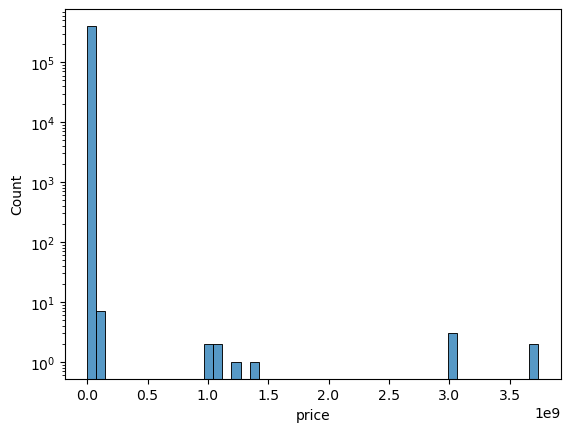

In [ ]:
sns.histplot(processed_df['price'], bins=50)
plt.yscale('log')
plt.show()

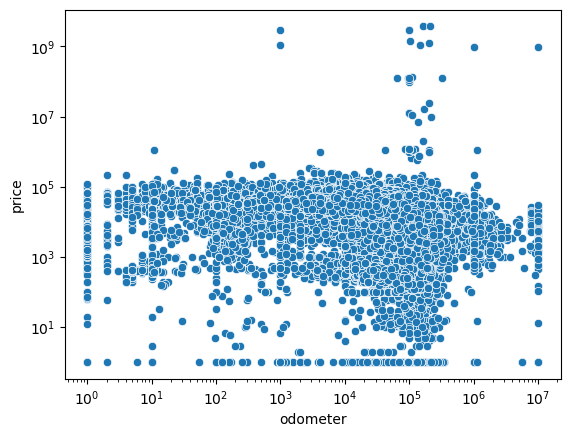

In [84]:
sns.scatterplot(x='odometer', y='price', data=processed_df)
plt.yscale('log')
plt.xscale('log')

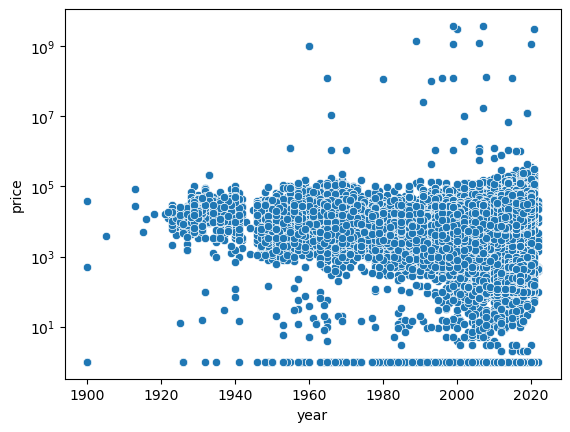

In [82]:
sns.scatterplot(x='year', y='price', data=processed_df)
plt.yscale('log')

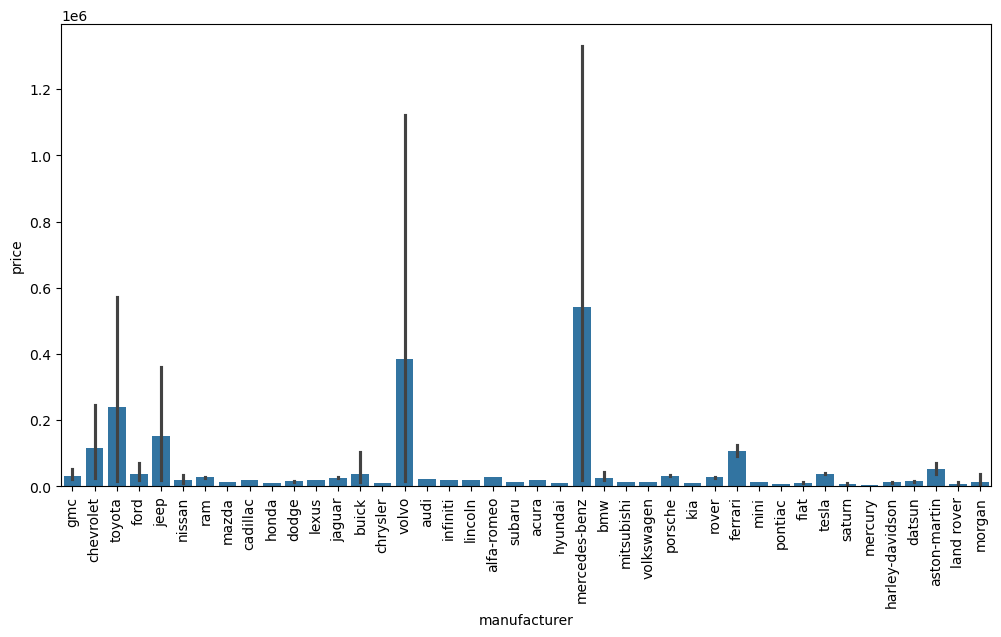

In [89]:
plt.figure(figsize=(12,6))
sns.barplot(x='manufacturer', y='price', data=processed_df)
plt.xticks(rotation=90)
# plt.yscale('log')
plt.show()

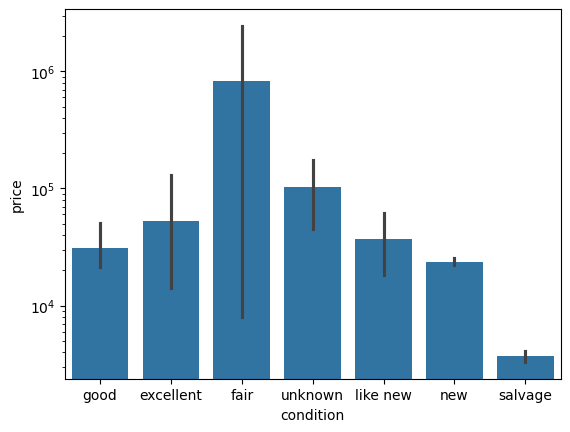

In [91]:
sns.barplot(x='condition', y='price', data=processed_df)
plt.yscale('log')
plt.show()

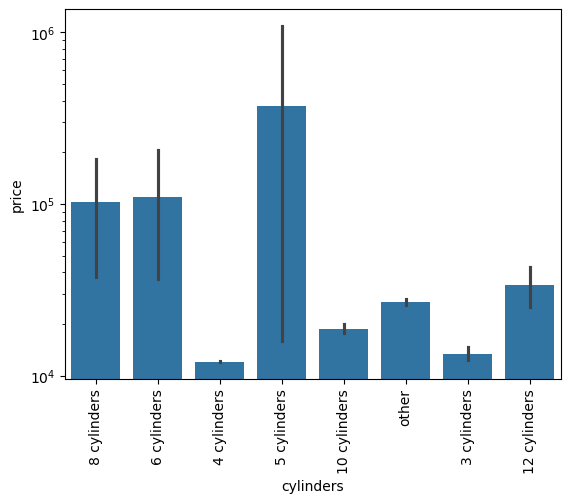

In [93]:
sns.barplot(x='cylinders', y='price', data=processed_df)
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

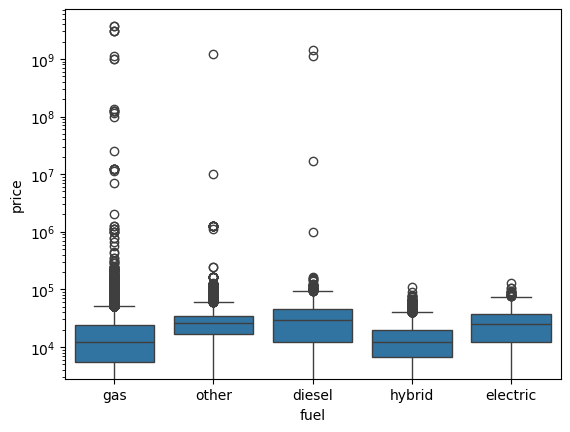

In [95]:
sns.boxplot(x='fuel', y='price', data=processed_df)
plt.yscale('log')

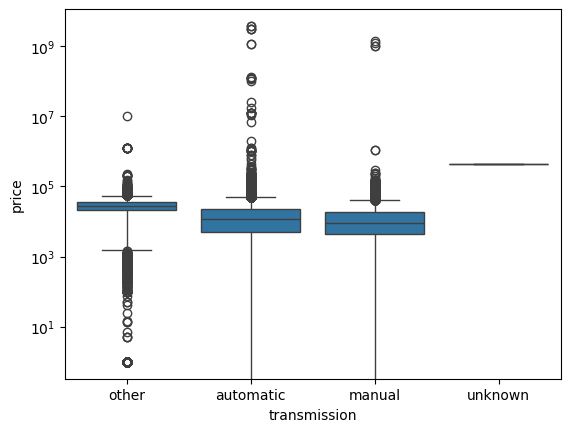

In [97]:
sns.boxplot(x='transmission', y='price', data=processed_df)
plt.yscale('log')
plt.show()

<Axes: xlabel='transmission', ylabel='price'>

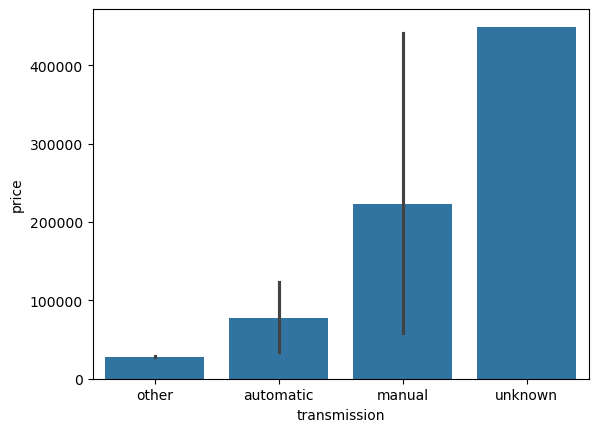

In [98]:
sns.barplot(x='transmission', y='price', data=processed_df)


In [ ]:
print(processed_df['price'].corr(processed_df['odometer']))


0.0108724362529078


In [103]:
print(processed_df['price'].corr(processed_df['year']))

-0.0054967506404611875


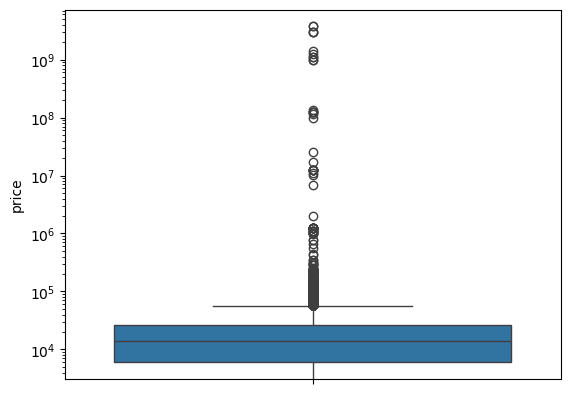

In [107]:
sns.boxplot(y=processed_df['price'])
plt.yscale('log')
plt.show()

# Feature Engineering

In [117]:
from datetime import datetime
current_year = datetime.now().year
processed_df['car_age'] = current_year - processed_df['year']

In [119]:
processed_df[['year','car_age']].head()

,year,car_age
27,2014,11
28,2010,15
29,2020,5
30,2017,8
31,2013,12


In [120]:
processed_df.columns

Index(['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'size', 'type', 'price',
       'car_age'],
      dtype='object')

# Encoding

In [121]:
processed_df = pd.get_dummies(processed_df, columns=['manufacturer', 'condition', 'cylinders',
    'fuel', 'title_status', 'transmission',
    'drive', 'size', 'type'], drop_first=True)

In [128]:
processed_df.head()

,year,odometer,price,car_age,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_unknown,type_van,type_wagon,normalized_price
27,2014,0.005792,33590,0.065574,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.000009
28,2010,0.007123,22590,0.098361,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.000006
29,2020,0.001916,39590,0.016393,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.000011
30,2017,0.004112,30990,0.040984,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.000008
31,2013,0.012800,15000,0.073770,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.000004


In [123]:
processed_df = processed_df.astype(int)

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_features = ['odometer', 'car_age']
processed_df[numerical_features] = scaler.fit_transform(processed_df[numerical_features])

In [127]:
processed_df['normalized_price'] = scaler.fit_transform(processed_df[['price']])

In [133]:
from sklearn.model_selection import train_test_split
X = processed_df.drop(columns=['price', 'normalized_price'])
y = processed_df['normalized_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
